<a href="https://colab.research.google.com/github/YukiNoji3/SampleCode/blob/master/%E9%86%B8%E9%80%A0%E3%83%87%E3%83%BC%E3%82%BF%E3%82%AF%E3%83%A9%E3%82%B9%E3%82%BF%E3%83%AA%E3%83%B3%E3%82%B0(%E5%8E%9F%E6%9D%90%E6%96%99).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from scipy.cluster.hierarchy import linkage, dendrogram,fcluster
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
from sklearn.decomposition import PCA
import seaborn as sns
%matplotlib inline

In [0]:
plt.rcParams["font.size"] = 12

In [0]:
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'Noto Sans CJK JP']


In [0]:
pd.set_option('display.max_columns', 100)

# データの読み込み
データ自体は別のスクリプトで整形・クレンジング

In [0]:
# 別途作成したデータを読み取る
df = pd.read_pickle(r"C:\work\醸造\クラスタリング\原材料.pickle")

***
## データの確認
- 不要な行：列の削除
- データ型の確認
- データの分布の確認

In [0]:
# データフレームのインデックスとしてロット日付を利用(文字列として扱う)
df = df.set_index(df["日付"].dt.strftime('%Y%m%d'))

In [0]:
# 2019/5/27より前の時点では原料の情報がないので削除する
df_ = df.loc[df["日付"] >= pd.datetime(2019,5,27)]

In [0]:
# 日付,ロット番号のカラムは削除
df_ = df_.drop(["CAVロットNo","日付"],axis=1)


In [0]:
# エクセルでのデータ確認用
df.loc[df["日付"] >= pd.datetime(2019,5,27)].to_clipboard()

In [0]:
# データ型の確認
df_.dtypes

①55  Mn  [ 2 ]      object
①57  Fe  [ 1 ]      object
①59  Co  [ 1 ]      object
①63  Cu  [ 1 ]      object
①66  Zn  [ 1 ]      object
①95  Mo  [ 1 ]      object
①39 K [2]           object
①43 Ca [2]          object
①24 Mg [1]          object
②pH                float64
②乾燥減量              float64
②含量                float64
③強熱減量              float64
③含量                float64
④比旋光度              float64
④液性                float64
④乾燥減量              float64
④窒素                float64
④カルシウム             float64
⑤pH                float64
⑤塩化物               float64
⑤硫酸塩               float64
⑤重金属               float64
⑤ヒ素                float64
⑤含量                float64
⑥エタノール分            float64
⑥蒸発残分              float64
⑥メタノール             float64
⑥1-プロパノール          float64
⑥2-プロパノール          float64
⑥1-ブタノール           float64
⑥2-ブタノール           float64
⑥2-メチル-1-プロパノール    float64
⑥2-メチル-1-ブタノール     float64
⑥アセトン              float64
⑥有機不純物             float64
⑥アセトアルデヒド          float64
⑦

In [0]:
# データ型の変更
df_["①55  Mn  [ 2 ] "] = df_["①55  Mn  [ 2 ] "].astype(np.float)
df_["①57  Fe  [ 1 ] "] = df_["①57  Fe  [ 1 ] "].astype(np.float)
df_["①59  Co  [ 1 ] "] = df_["①59  Co  [ 1 ] "].astype(np.float)
df_["①63  Cu  [ 1 ] "] = df_["①63  Cu  [ 1 ] "].astype(np.float)
df_["①66  Zn  [ 1 ] "] = df_["①66  Zn  [ 1 ] "].astype(np.float)
df_["①95  Mo  [ 1 ] "] = df_["①95  Mo  [ 1 ] "].astype(np.float)
df_["①39 K [2]"] = df_["①39 K [2]"].astype(np.float)
df_["①43 Ca [2]"] = df_["①43 Ca [2]"].astype(np.float)
df_["①24 Mg [1]"] = df_["①24 Mg [1]"].astype(np.float)

In [0]:
# データ型の確認
df_.dtypes

①55  Mn  [ 2 ]     float64
①57  Fe  [ 1 ]     float64
①59  Co  [ 1 ]     float64
①63  Cu  [ 1 ]     float64
①66  Zn  [ 1 ]     float64
①95  Mo  [ 1 ]     float64
①39 K [2]          float64
①43 Ca [2]         float64
①24 Mg [1]         float64
②pH                float64
②乾燥減量              float64
②含量                float64
③強熱減量              float64
③含量                float64
④比旋光度              float64
④液性                float64
④乾燥減量              float64
④窒素                float64
④カルシウム             float64
⑤pH                float64
⑤塩化物               float64
⑤硫酸塩               float64
⑤重金属               float64
⑤ヒ素                float64
⑤含量                float64
⑥エタノール分            float64
⑥蒸発残分              float64
⑥メタノール             float64
⑥1-プロパノール          float64
⑥2-プロパノール          float64
⑥1-ブタノール           float64
⑥2-ブタノール           float64
⑥2-メチル-1-プロパノール    float64
⑥2-メチル-1-ブタノール     float64
⑥アセトン              float64
⑥有機不純物             float64
⑥アセトアルデヒド          float64
⑦

In [0]:
df_.describe()

,①55 Mn [ 2 ],①57 Fe [ 1 ],①59 Co [ 1 ],①63 Cu [ 1 ],①66 Zn [ 1 ],①95 Mo [ 1 ],①39 K [2],①43 Ca [2],①24 Mg [1],②pH,②乾燥減量,②含量,③強熱減量,③含量,④比旋光度,④液性,④乾燥減量,④窒素,④カルシウム,⑤pH,⑤塩化物,⑤硫酸塩,⑤重金属,⑤ヒ素,⑤含量,⑥エタノール分,⑥蒸発残分,⑥メタノール,⑥1-プロパノール,⑥2-プロパノール,⑥1-ブタノール,⑥2-ブタノール,⑥2-メチル-1-プロパノール,⑥2-メチル-1-ブタノール,⑥アセトン,⑥有機不純物,⑥アセトアルデヒド,⑦ｐＨ,⑦アミノ態窒素,⑦乾燥減量,⑦強熱残分,⑦食塩,⑦全窒素
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,7.600000e+01,76.000000,76.000000,76.0,76.000000,7.600000e+01,7.600000e+01,7.600000e+01,76.0,76.0,76.000000,76.000000,76.0,76.000000,76.000000,76.000000,76.0,76.0,76.0,76.0,76.0,76.0,76.0,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,0.037141,2.167773,0.003676,0.038806,2.002413,0.053762,0.972483,6.005511,2.444280,9.021053,0.061184,99.703947,0.508461,0.999079,2.710000e+01,7.122368,1.977632,5.8,8.377632,7.900000e+00,3.500000e-02,3.800000e-02,4.0,3.0,98.382895,95.334868,0.0,1.315789,0.177632,3.309211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.548947,5.520263,4.233026,10.785395,2.765000,12.097763
std,0.012500,1.916598,0.000826,0.080850,2.657889,0.031394,0.009530,0.481552,0.081515,0.064943,0.029753,0.179956,0.000502,0.001004,7.152640e-15,0.041948,0.041948,0.0,0.041948,1.788160e-15,6.985000e-18,1.397000e-17,0.0,0.0,0.090019,0.073039,0.0,0.460739,0.371519,1.306311,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017094,0.047860,0.108702,0.117546,0.130205,0.074218
min,0.011246,1.625392,0.000000,0.000000,0.000000,0.024766,0.957293,5.682455,2.390988,8.900000,0.020000,99.400000,0.508000,0.998000,2.710000e+01,7.100000,1.900000,5.8,8.300000,7.900000e+00,3.500000e-02,3.800000e-02,4.0,3.0,98.200000,95.200000,0.0,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.520000,5.460000,4.120000,10.670000,2.590000,11.990000
25%,0.029849,1.684945,0.003551,0.000000,0.286775,0.034188,0.965120,5.851384,2.407180,9.000000,0.047500,99.600000,0.508000,0.998000,2.710000e+01,7.100000,2.000000,5.8,8.400000,7.900000e+00,3.500000e-02,3.800000e-02,4.0,3.0,98.300000,95.300000,0.0,1.000000,0.000000,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.530000,5.470000,4.120000,10.690000,2.590000,12.020000
50%,0.038521,1.767583,0.003882,0.000000,0.369119,0.042394,0.974742,5.943823,2.432498,9.000000,0.050000,99.700000,0.508000,1.000000,2.710000e+01,7.100000,2.000000,5.8,8.400000,7.900000e+00,3.500000e-02,3.800000e-02,4.0,3.0,98.400000,95.350000,0.0,1.000000,0.000000,3.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.560000,5.540000,4.235000,10.730000,2.780000,12.140000
75%,0.043386,1.923067,0.004059,0.032284,4.318705,0.062284,0.980556,6.029588,2.448977,9.100000,0.070000,99.800000,0.509000,1.000000,2.710000e+01,7.100000,2.000000,5.8,8.400000,7.900000e+00,3.500000e-02,3.800000e-02,4.0,3.0,98.400000,95.400000,0.0,1.500000,0.000000,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.560000,5.540000,4.310000,10.960000,2.910000,12.140000
max,0.065920,11.543086,0.004675,0.335196,6.898470,0.196333,0.992156,8.294926,2.829751,9.100000,0.110000,100.000000,0.509000,1.000000,2.710000e+01,7.200000,2.000000,5.8,8.400000,7.900000e+00,3.500000e-02,3.800000e-02,4.0,3.0,98.500000,95.400000,0.0,2.000000,1.000000,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.560000,5.590000,4.380000,10.960000,2.940000,12.190000


In [0]:
df_.shape

(76, 43)

In [0]:
df_.head()

,①55 Mn [ 2 ],①57 Fe [ 1 ],①59 Co [ 1 ],①63 Cu [ 1 ],①66 Zn [ 1 ],①95 Mo [ 1 ],①39 K [2],①43 Ca [2],①24 Mg [1],②pH,②乾燥減量,②含量,③強熱減量,③含量,④比旋光度,④液性,④乾燥減量,④窒素,④カルシウム,⑤pH,⑤塩化物,⑤硫酸塩,⑤重金属,⑤ヒ素,⑤含量,⑥エタノール分,⑥蒸発残分,⑥メタノール,⑥1-プロパノール,⑥2-プロパノール,⑥1-ブタノール,⑥2-ブタノール,⑥2-メチル-1-プロパノール,⑥2-メチル-1-ブタノール,⑥アセトン,⑥有機不純物,⑥アセトアルデヒド,⑦ｐＨ,⑦アミノ態窒素,⑦乾燥減量,⑦強熱残分,⑦食塩,⑦全窒素
日付,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20190527,0.011246,11.543086,0.000000,0.212484,0.000000,0.049971,0.962871,8.294926,2.829751,9.00,0.05,99.6,0.508,1.0,27.1,7.1,2.0,5.8,8.4,7.9,0.035,0.038,4.0,3.0,98.4,95.35,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.52,5.59,4.38,10.69,2.91,12.19
20190529,0.011246,11.543086,0.000000,0.212484,0.000000,0.049971,0.962871,8.294926,2.829751,9.00,0.05,99.6,0.508,1.0,27.1,7.1,2.0,5.8,8.4,7.9,0.035,0.038,4.0,3.0,98.4,95.30,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.52,5.59,4.38,10.69,2.91,12.19
20190531,0.011246,11.543086,0.000000,0.212484,0.000000,0.049971,0.962871,8.294926,2.829751,8.90,0.03,99.4,0.508,1.0,27.1,7.1,2.0,5.8,8.4,7.9,0.035,0.038,4.0,3.0,98.4,95.35,0.0,1.5,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.52,5.59,4.38,10.69,2.91,12.19
20190603,0.051652,1.930196,0.003148,0.000000,0.024257,0.196333,0.992156,5.851384,2.432498,8.95,0.04,99.5,0.508,1.0,27.1,7.1,2.0,5.8,8.4,7.9,0.035,0.038,4.0,3.0,98.4,95.35,0.0,1.5,0.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.52,5.59,4.38,10.69,2.91,12.19
20190605,0.051652,1.930196,0.003148,0.000000,0.024257,0.196333,0.992156,5.851384,2.432498,8.95,0.04,99.5,0.508,1.0,27.1,7.1,2.0,5.8,8.4,7.9,0.035,0.038,4.0,3.0,98.4,95.35,0.0,1.5,0.5,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.52,5.59,4.38,10.69,2.91,12.19


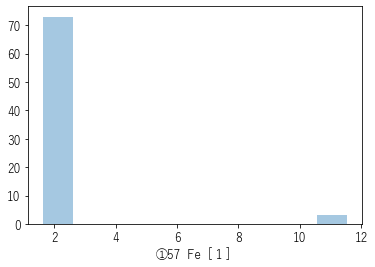

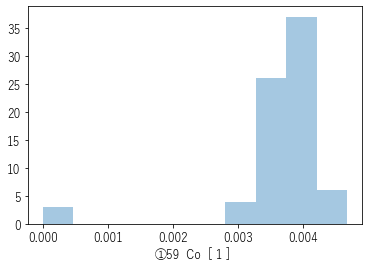

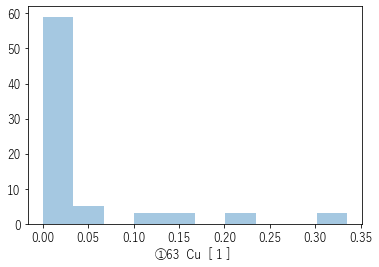

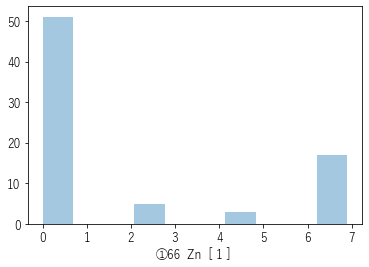

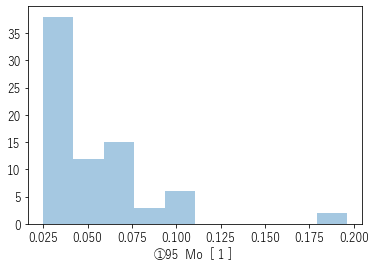

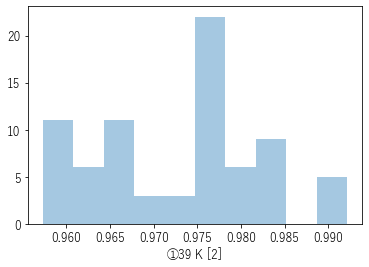

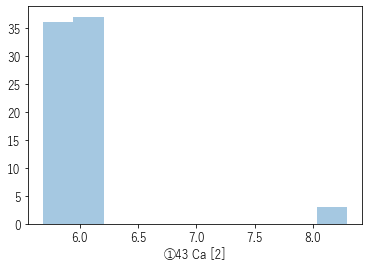

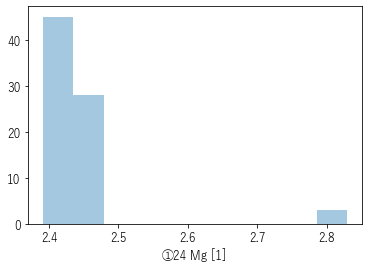

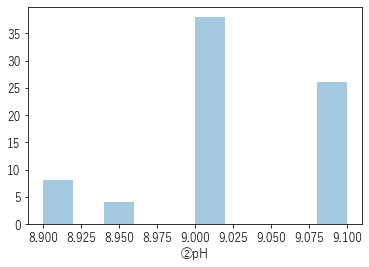

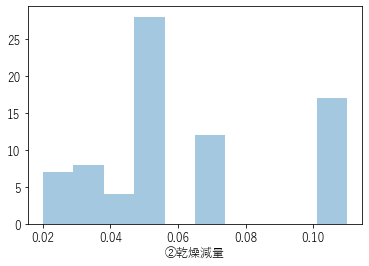

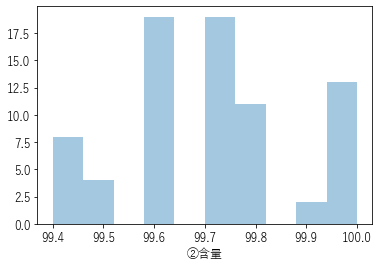

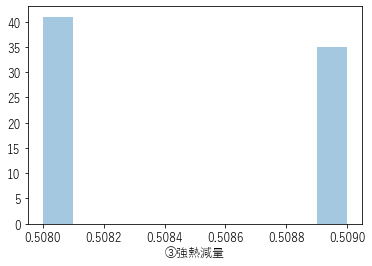

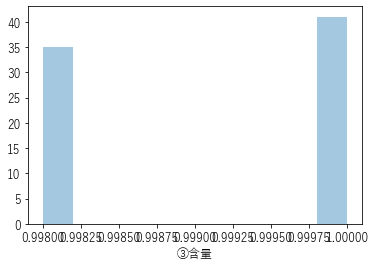

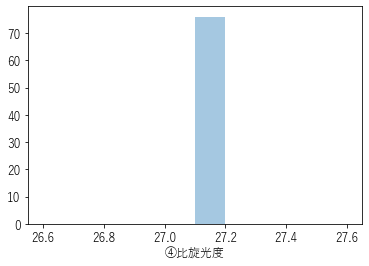

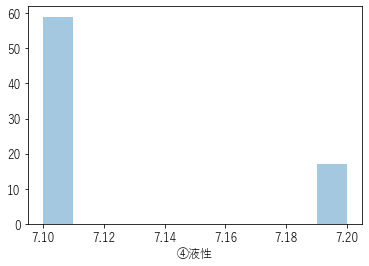

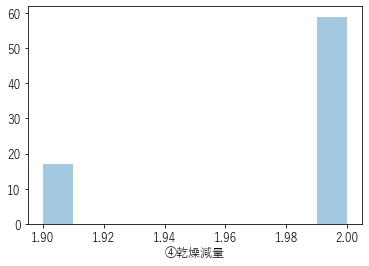

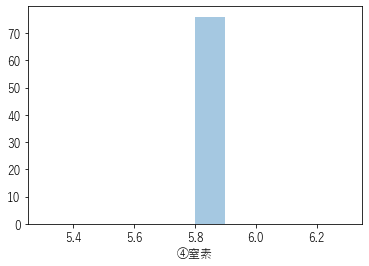

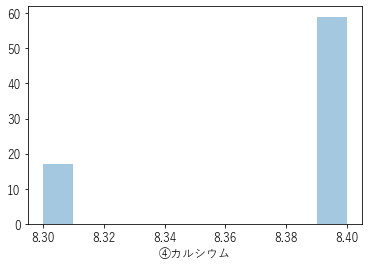

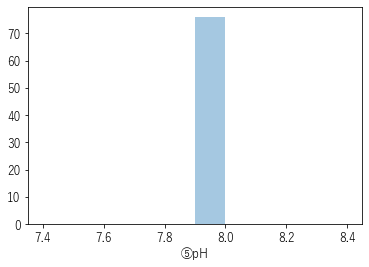

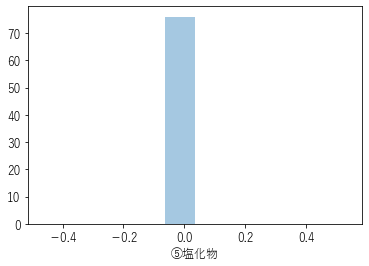

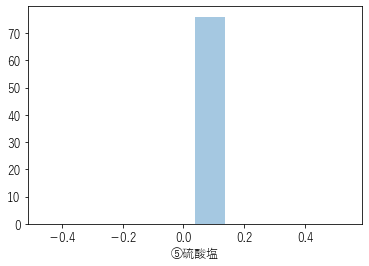

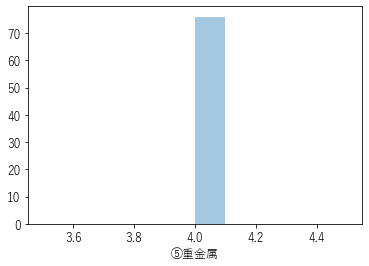

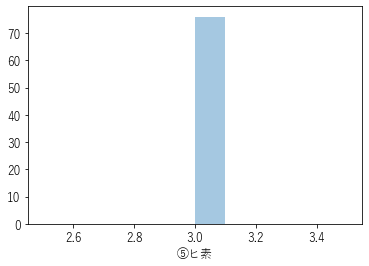

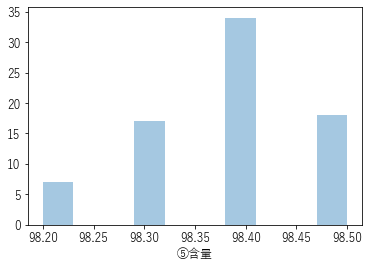

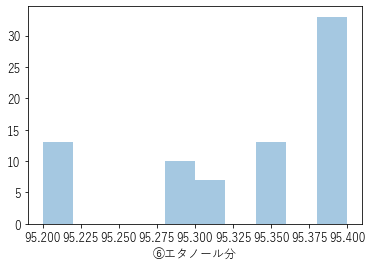

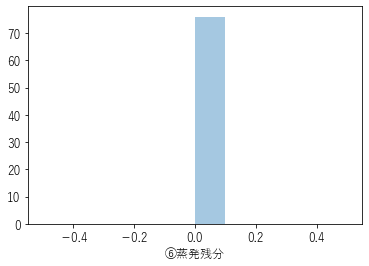

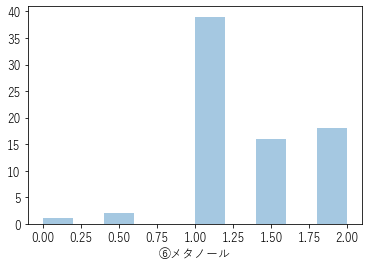

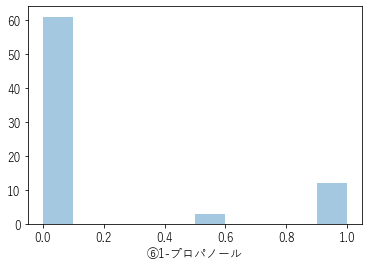

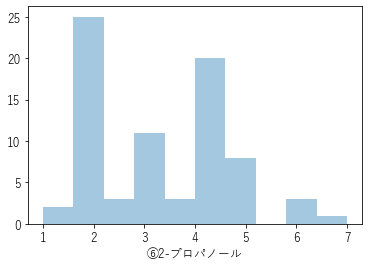

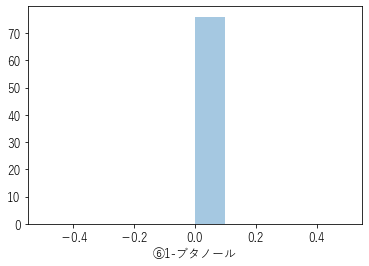

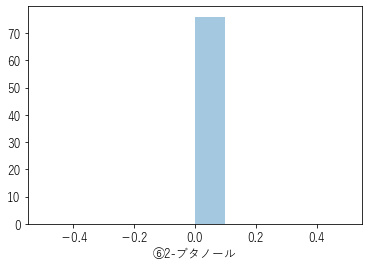

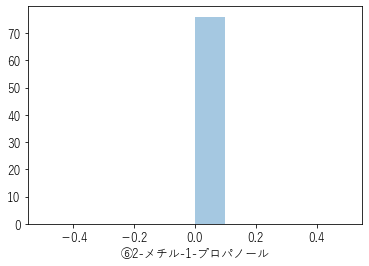

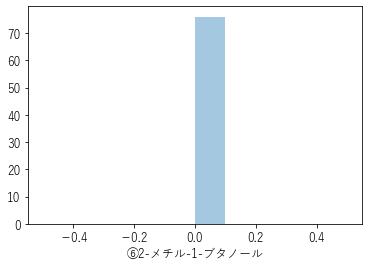

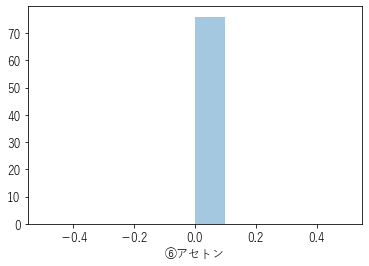

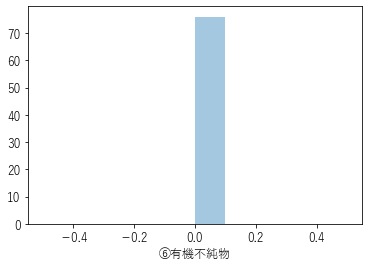

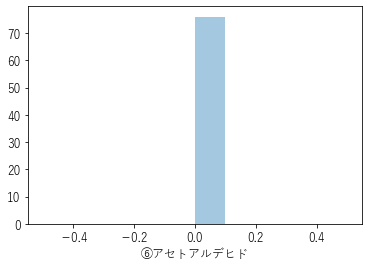

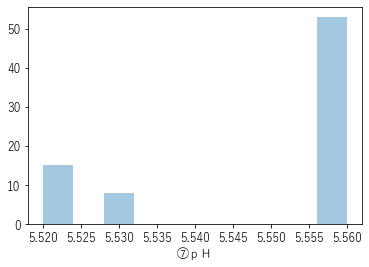

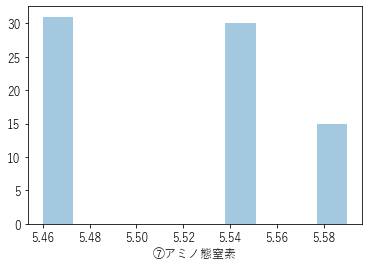

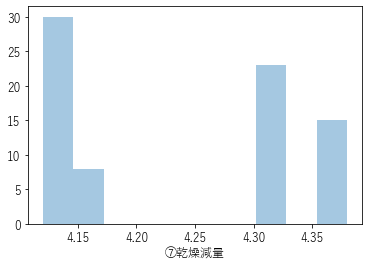

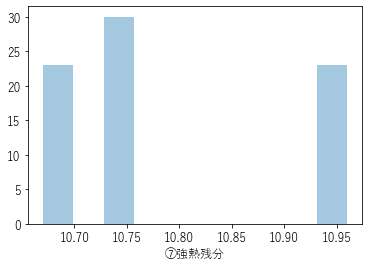

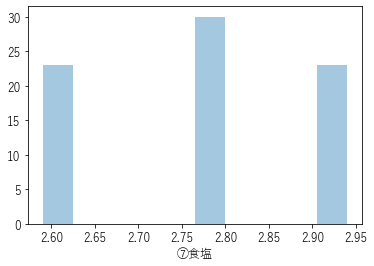

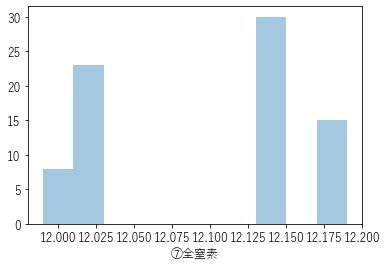

In [0]:
# ヒストグラムを表示して全体像をつかむ
for c in df_.iloc[:,1:].columns:
    
    sns.distplot(df_[c], kde=False, rug=False, bins=10) 
    plt.show()
    

***

# 主成分分析(PCA)
43次元のデータを4次元に圧縮  
データはz-scoreで標準化

In [0]:
components = 4
pca = PCA(n_components=components)

z_score = (df_ - df_.mean())/df_.std()
z_score = z_score.fillna(0)
feature = pca.fit_transform(z_score)

In [0]:
pca_df = pd.DataFrame(feature, columns=["PC{}".format(x + 1) for x in range(components)],index=df_.index)

In [0]:
pca_df

,PC1,PC2,PC3,PC4
日付,,,,
20190527,-2.277439,6.262210,7.075097,4.343470
20190529,-2.207018,6.207375,7.155594,4.325480
20190531,-3.025843,6.916178,6.497259,4.515552
20190603,-3.377110,3.166687,-1.370878,-1.801174
20190605,-3.627521,3.239065,-1.510637,-2.111009
...,...,...,...,...
20191118,3.303027,2.405111,-3.151983,1.746718
20191121,3.303027,2.405111,-3.151983,1.746718
20191124,4.091283,2.845195,-3.662570,2.443800


## PCAの結果確認

### 第一主成分、第二主成分での散布図のプロット

Text(0, 0.5, 'PC2')

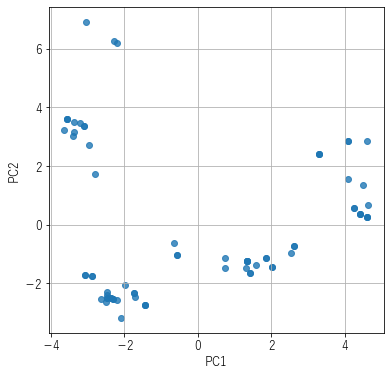

In [0]:
# 第一主成分、第二主成分での散布図のプロット
plt.figure(figsize=(6, 6))
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")


### 第二主成分、第三主成分での散布図のプロット

Text(0, 0.5, 'PC3')

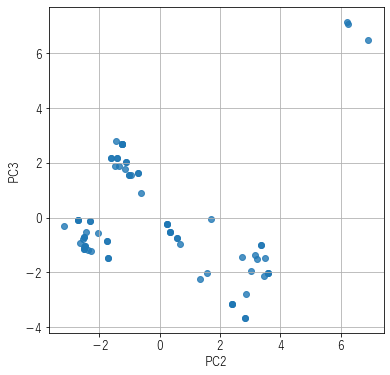

In [0]:
# 第二主成分、第三主成分での散布図のプロット
plt.figure(figsize=(6, 6))
plt.scatter(feature[:, 1], feature[:, 2], alpha=0.8)
plt.grid()
plt.xlabel("PC2")
plt.ylabel("PC3")


### 各成分の寄与率

In [0]:
# 各成分の寄与率
pca.explained_variance_ratio_

array([0.30072663, 0.22097262, 0.17352631, 0.10930362])

# PCAした結果で階層的クラスタリング

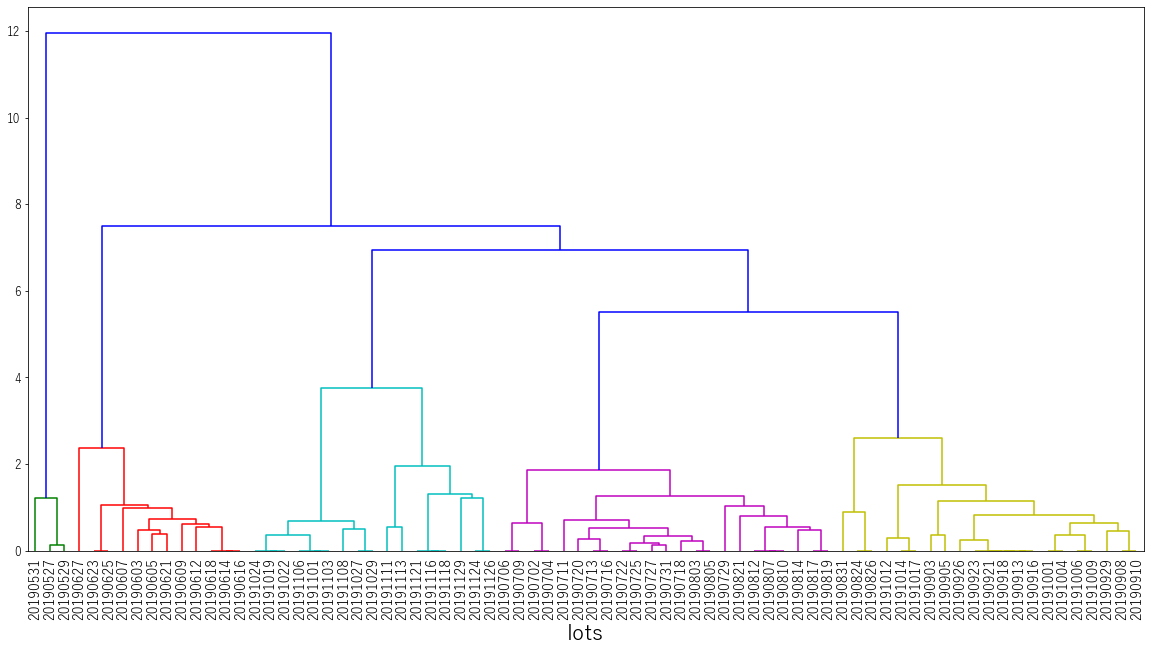

In [0]:
Z = linkage(pca_df.iloc[:,0:4], method='average', metric="euclidean")
    
fig, ax = plt.subplots(figsize=(20,10))
ax.set_xlabel("lots",fontsize=22)
d = dendrogram(Z,labels=list(df_.index),ax=ax,color_threshold=4,leaf_font_size=14)

In [0]:
c = fcluster(Z, 4, criterion= "distance")

In [0]:
df_["claster"] = c
pca_df["claster"] = [f"Gr {cl}" for cl in c] 

### 各クラスタの数の確認

In [0]:
gr_count = df_.groupby("claster").count().iloc[:,[0]]
gr_count.columns = ["count"]
gr_count

,count
claster,
1,3
2,12
3,17
4,23
5,21


### クラスタごとに色分けして散布図でプロット

Text(0, 0.5, 'PC2')

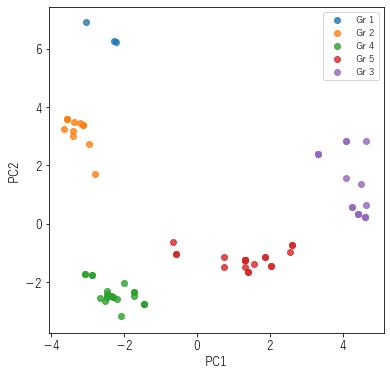

In [0]:
plt.figure(figsize=(6, 6))

for classter in pca_df.claster.unique():
    
    cl = pca_df[pca_df.claster==classter]
    
    plt.scatter(cl["PC1"], cl["PC2"], alpha=0.8, label=classter)

plt.legend(loc="upper right",fontsize=10)

plt.xlabel("PC1")
plt.ylabel("PC2")


# はずれ値であるGr 1(5/27,29,31)を除去して再度PCAおよびクラスタリング


In [0]:
df_2 = df_.iloc[3:].copy()

In [0]:
df_2.head()

,①55 Mn [ 2 ],①57 Fe [ 1 ],①59 Co [ 1 ],①63 Cu [ 1 ],①66 Zn [ 1 ],①95 Mo [ 1 ],①39 K [2],①43 Ca [2],①24 Mg [1],②pH,②乾燥減量,②含量,③強熱減量,③含量,④比旋光度,④液性,④乾燥減量,④窒素,④カルシウム,⑤pH,⑤塩化物,⑤硫酸塩,⑤重金属,⑤ヒ素,⑤含量,⑥エタノール分,⑥蒸発残分,⑥メタノール,⑥1-プロパノール,⑥2-プロパノール,⑥1-ブタノール,⑥2-ブタノール,⑥2-メチル-1-プロパノール,⑥2-メチル-1-ブタノール,⑥アセトン,⑥有機不純物,⑥アセトアルデヒド,⑦ｐＨ,⑦アミノ態窒素,⑦乾燥減量,⑦強熱残分,⑦食塩,⑦全窒素,claster
日付,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20190603,0.051652,1.930196,0.003148,0.0,0.024257,0.196333,0.992156,5.851384,2.432498,8.95,0.04,99.5,0.508,1.0,27.1,7.1,2.0,5.8,8.4,7.9,0.035,0.038,4.0,3.0,98.4,95.35,0.0,1.5,0.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.52,5.59,4.38,10.69,2.91,12.19,2
20190605,0.051652,1.930196,0.003148,0.0,0.024257,0.196333,0.992156,5.851384,2.432498,8.95,0.04,99.5,0.508,1.0,27.1,7.1,2.0,5.8,8.4,7.9,0.035,0.038,4.0,3.0,98.4,95.35,0.0,1.5,0.5,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.52,5.59,4.38,10.69,2.91,12.19,2
20190607,0.065920,1.956378,0.003549,0.0,0.136442,0.100419,0.981590,5.753759,2.433989,8.95,0.04,99.5,0.508,1.0,27.1,7.1,2.0,5.8,8.4,7.9,0.035,0.038,4.0,3.0,98.4,95.35,0.0,1.5,0.5,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.52,5.59,4.38,10.69,2.91,12.19,2
20190609,0.065920,1.956378,0.003549,0.0,0.136442,0.100419,0.981590,5.753759,2.433989,8.95,0.04,99.5,0.508,1.0,27.1,7.1,2.0,5.8,8.4,7.9,0.035,0.038,4.0,3.0,98.4,95.40,0.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.52,5.59,4.38,10.69,2.91,12.19,2
20190612,0.065920,1.956378,0.003549,0.0,0.136442,0.100419,0.981590,5.753759,2.433989,8.90,0.03,99.4,0.508,1.0,27.1,7.1,2.0,5.8,8.4,7.9,0.035,0.038,4.0,3.0,98.2,95.30,0.0,1.5,0.5,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.52,5.59,4.38,10.69,2.91,12.19,2


## 主成分分析(3次元に次元圧縮)

In [0]:
components = 3
pca = PCA(n_components=components)

z_score = (df_2 - df_2.mean())/df_2.std()
z_score = z_score.fillna(0)
feature = pca.fit_transform(z_score)

In [0]:
pca_df = pd.DataFrame(feature, columns=["PC{}".format(x + 1) for x in range(components)],index=df_2.index)

### 第一主成分と第二主成分でプロット

Text(0, 0.5, 'PC2')

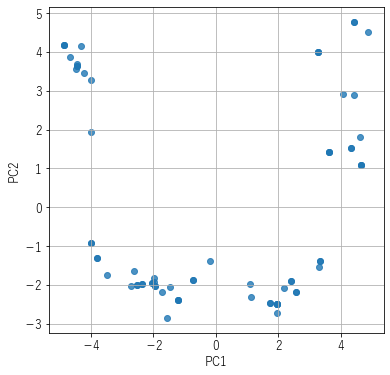

In [0]:
plt.figure(figsize=(6, 6))
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")

### 階層的クラスタリング

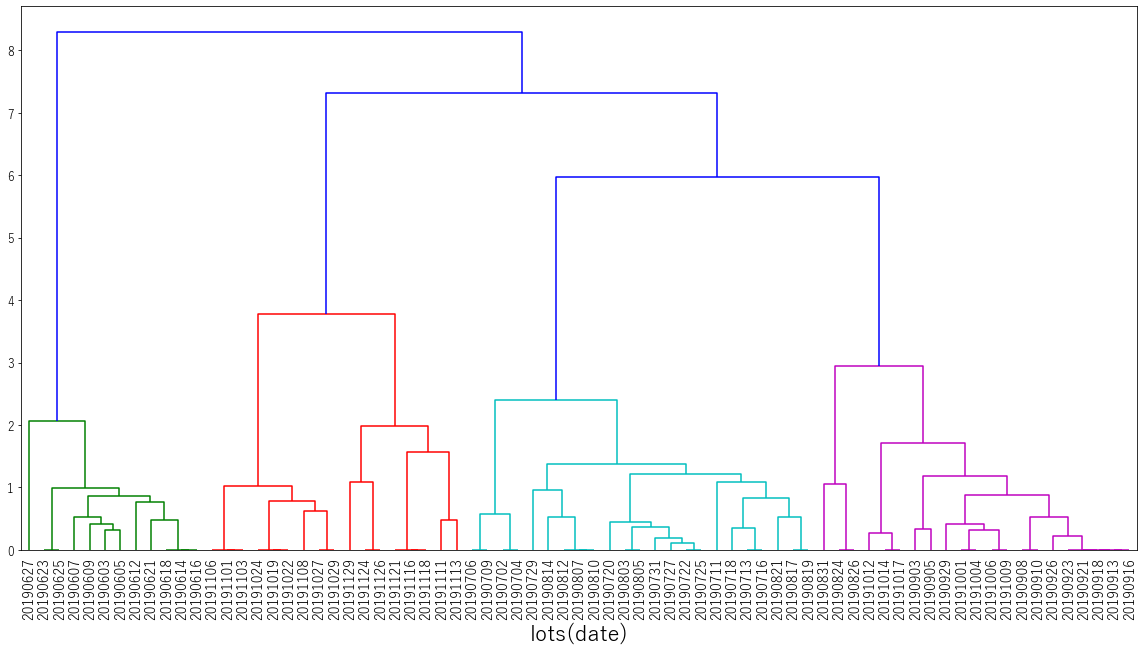

In [0]:
Z = linkage(pca_df.iloc[:,0:4], method='average', metric="euclidean")
    
fig, ax = plt.subplots(figsize=(20,10))
ax.set_xlabel("lots(date)",fontsize=22)
d = dendrogram(Z,labels=list(df_2.index),ax=ax,color_threshold=4,leaf_font_size=14)

In [0]:
c = fcluster(Z, 4, criterion= "distance")

In [0]:
df_2["claster"] = c
pca_df["claster"] = [f"Gr {cl}" for cl in c] 

In [0]:
pca_df

,PC1,PC2,PC3,claster
日付,,,,
20190603,-4.215229,3.453838,-1.719348,Gr 1
20190605,-4.472987,3.557780,-1.877443,Gr 1
20190607,-3.991984,3.285609,-1.559901,Gr 1
20190609,-4.442361,3.682029,-1.463508,Gr 1
20190612,-4.323731,4.152859,-1.349660,Gr 1
...,...,...,...,...
20191118,3.259643,3.984753,2.344333,Gr 2
20191121,3.259643,3.984753,2.344333,Gr 2
20191124,4.411138,4.773293,3.484157,Gr 2


In [0]:
gr_count = df_2.groupby("claster").count().iloc[:,[0]]
gr_count.columns = ["count"]
gr_count

,count
claster,
1,12
2,17
3,23
4,21


Text(0, 0.5, 'PC2')

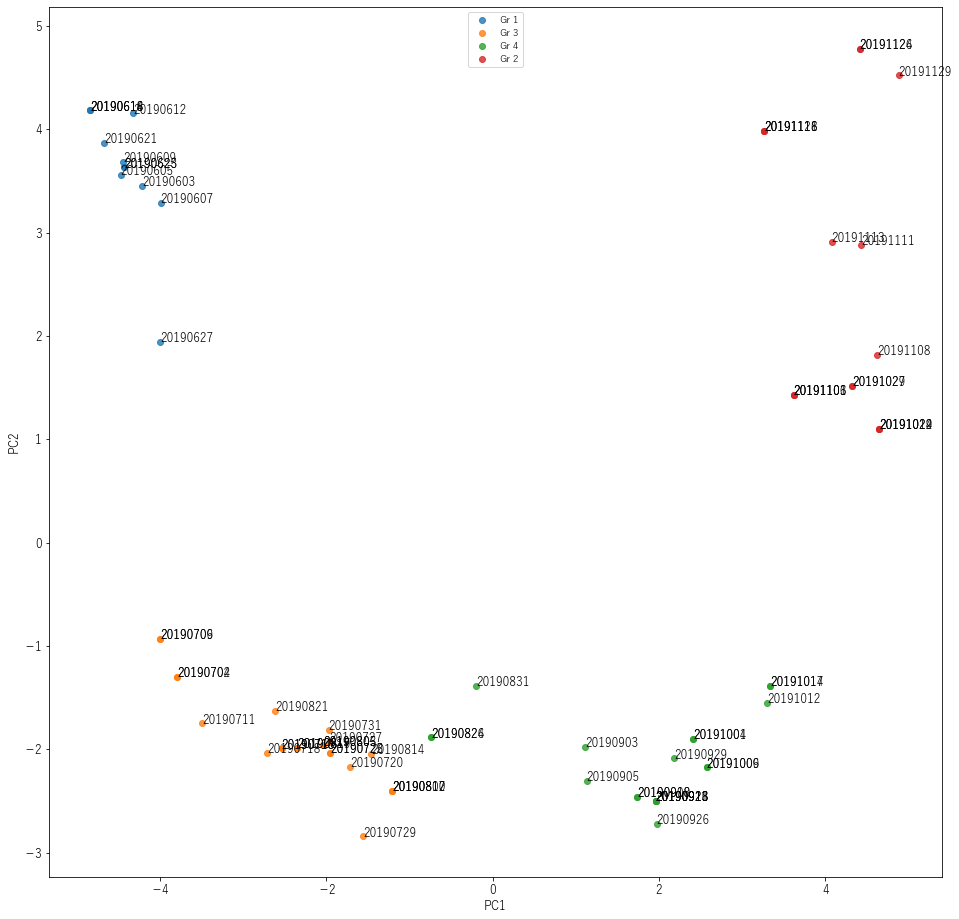

In [0]:
plt.figure(figsize=(16, 16))

for classter in pca_df.claster.unique():
    
    cl = pca_df[pca_df.claster==classter]
    
    plt.scatter(cl["PC1"], cl["PC2"], alpha=0.8, label=classter)

plt.legend(loc="upper center",fontsize=10)


for i in range(pca_df.shape[0]):
    label = pca_df.index[i]
    x = pca_df.iloc[i,0]
    y = pca_df.iloc[i,1]
        
    plt.annotate(label,xy=(x,y),)

#plt.annotate(list(pca_df.index),xy=(pca_df["PC1"].tolist(),pca_df["PC2"].to))

plt.xlabel("PC1")
plt.ylabel("PC2")



In [0]:
pca_df.index[0]

'20190603'

Text(0, 0.5, 'PC3')

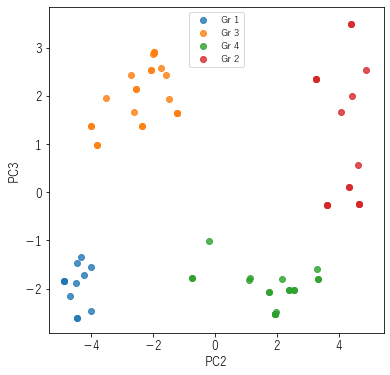

In [0]:
plt.figure(figsize=(6, 6))

for classter in pca_df.claster.unique():
    
    cl = pca_df[pca_df.claster==classter]
    
    plt.scatter(cl["PC1"], cl["PC3"], alpha=0.8, label=classter)

plt.legend(loc="upper center",fontsize=10)

plt.xlabel("PC2")
plt.ylabel("PC3")

In [0]:
dt_df = pca_df.copy()
dt_df["日付"] = pd.to_datetime(pca_df.index,format='%Y%m%d')

### クラスタごとの日付確認

In [0]:
dt_df.groupby("claster").agg({"日付":["min","max"]})

日付           
               min        max
claster                      
Gr 1    2019-06-03 2019-06-27
Gr 2    2019-10-19 2019-11-29
Gr 3    2019-07-02 2019-08-21
Gr 4    2019-08-24 2019-10-17

In [0]:
### MECの結果と合わせるため
# Gr1 → Gr1
# Gr2 → Gr4
# Gr3 → Gr2
# Gr4 → Gr3
# に変換する
df_2["claster"] = df_2["claster"].apply(lambda x: {1:1,2:4,3:2,4:3}[x])
pca_df["claster"] = pca_df["claster"].apply(lambda x: {"Gr 1":1,"Gr 2":4,"Gr 3":2,"Gr 4":3}[x])

In [0]:
dt_df = pca_df.copy()
dt_df["日付"] = pd.to_datetime(pca_df.index,format='%Y%m%d')
dt_df.groupby("claster").agg({"日付":["min","max","count"]})

日付                 
               min        max count
claster                            
1       2019-06-03 2019-06-27    12
2       2019-07-02 2019-08-21    23
3       2019-08-24 2019-10-17    21
4       2019-10-19 2019-11-29    17

# MECとの結果と比較

MEC資料
![image.png](attachment:image.png)

#### 所感
- 特徴量空間での分布は異なっており、単純な主成分分析ではなくMECのノウハウが入っていると思われる。 
- 特徴量空間は異なっているものの、階層的クラスタリングでのグルーピングは一致した。


### 原料パターン可視化結果

In [0]:
file = r"C:\work\醸造\505A号機データ0225更新.xlsx"
base = pd.read_excel(file,sheet_name="データ",header=1)

In [0]:
base = base.loc[:,["日付","標準酸度換算引卸速度","サイクルタイム","AL歩留","TA歩留"]]

In [0]:
base["日付"] = pd.to_datetime("2019/" + base["日付"] ).dt.strftime('%Y%m%d')

In [0]:
base.dtypes

日付             object
標準酸度換算引卸速度    float64
サイクルタイム       float64
AL歩留          float64
TA歩留          float64
dtype: object

In [0]:
df_2

,①55 Mn [ 2 ],①57 Fe [ 1 ],①59 Co [ 1 ],①63 Cu [ 1 ],①66 Zn [ 1 ],①95 Mo [ 1 ],①39 K [2],①43 Ca [2],①24 Mg [1],②pH,②乾燥減量,②含量,③強熱減量,③含量,④比旋光度,④液性,④乾燥減量,④窒素,④カルシウム,⑤pH,⑤塩化物,⑤硫酸塩,⑤重金属,⑤ヒ素,⑤含量,⑥エタノール分,⑥蒸発残分,⑥メタノール,⑥1-プロパノール,⑥2-プロパノール,⑥1-ブタノール,⑥2-ブタノール,⑥2-メチル-1-プロパノール,⑥2-メチル-1-ブタノール,⑥アセトン,⑥有機不純物,⑥アセトアルデヒド,⑦ｐＨ,⑦アミノ態窒素,⑦乾燥減量,⑦強熱残分,⑦食塩,⑦全窒素,claster
日付,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20190603,0.051652,1.930196,0.003148,0.000000,0.024257,0.196333,0.992156,5.851384,2.432498,8.95,0.04,99.5,0.508,1.000,27.1,7.1,2.0,5.8,8.4,7.9,0.035,0.038,4.0,3.0,98.4,95.35,0.0,1.5,0.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.52,5.59,4.38,10.69,2.91,12.19,1
20190605,0.051652,1.930196,0.003148,0.000000,0.024257,0.196333,0.992156,5.851384,2.432498,8.95,0.04,99.5,0.508,1.000,27.1,7.1,2.0,5.8,8.4,7.9,0.035,0.038,4.0,3.0,98.4,95.35,0.0,1.5,0.5,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.52,5.59,4.38,10.69,2.91,12.19,1
20190607,0.065920,1.956378,0.003549,0.000000,0.136442,0.100419,0.981590,5.753759,2.433989,8.95,0.04,99.5,0.508,1.000,27.1,7.1,2.0,5.8,8.4,7.9,0.035,0.038,4.0,3.0,98.4,95.35,0.0,1.5,0.5,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.52,5.59,4.38,10.69,2.91,12.19,1
20190609,0.065920,1.956378,0.003549,0.000000,0.136442,0.100419,0.981590,5.753759,2.433989,8.95,0.04,99.5,0.508,1.000,27.1,7.1,2.0,5.8,8.4,7.9,0.035,0.038,4.0,3.0,98.4,95.40,0.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.52,5.59,4.38,10.69,2.91,12.19,1
20190612,0.065920,1.956378,0.003549,0.000000,0.136442,0.100419,0.981590,5.753759,2.433989,8.90,0.03,99.4,0.508,1.000,27.1,7.1,2.0,5.8,8.4,7.9,0.035,0.038,4.0,3.0,98.2,95.30,0.0,1.5,0.5,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.52,5.59,4.38,10.69,2.91,12.19,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20191118,0.050381,1.625392,0.003939,0.152065,4.318705,0.024766,0.983028,6.053173,2.432514,9.00,0.02,99.7,0.509,0.998,27.1,7.2,1.9,5.8,8.3,7.9,0.035,0.038,4.0,3.0,98.3,95.40,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.53,5.46,4.16,10.67,2.94,11.99,4
20191121,0.050381,1.625392,0.003939,0.152065,4.318705,0.024766,0.983028,6.053173,2.432514,9.00,0.02,99.7,0.509,0.998,27.1,7.2,1.9,5.8,8.3,7.9,0.035,0.038,4.0,3.0,98.3,95.40,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.53,5.46,4.16,10.67,2.94,11.99,4
20191124,0.044468,1.643974,0.004675,0.335196,6.898470,0.027898,0.991197,6.148617,2.410943,9.00,0.02,99.7,0.509,0.998,27.1,7.2,1.9,5.8,8.3,7.9,0.035,0.038,4.0,3.0,98.3,95.40,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.53,5.46,4.16,10.67,2.94,11.99,4


In [0]:
df_3 = df_2.merge(base,on='日付',how='inner')

In [0]:
df_3

,日付,①55 Mn [ 2 ],①57 Fe [ 1 ],①59 Co [ 1 ],①63 Cu [ 1 ],①66 Zn [ 1 ],①95 Mo [ 1 ],①39 K [2],①43 Ca [2],①24 Mg [1],②pH,②乾燥減量,②含量,③強熱減量,③含量,④比旋光度,④液性,④乾燥減量,④窒素,④カルシウム,⑤pH,⑤塩化物,⑤硫酸塩,⑤重金属,⑤ヒ素,⑤含量,⑥エタノール分,⑥蒸発残分,⑥メタノール,⑥1-プロパノール,⑥2-プロパノール,⑥1-ブタノール,⑥2-ブタノール,⑥2-メチル-1-プロパノール,⑥2-メチル-1-ブタノール,⑥アセトン,⑥有機不純物,⑥アセトアルデヒド,⑦ｐＨ,⑦アミノ態窒素,⑦乾燥減量,⑦強熱残分,⑦食塩,⑦全窒素,claster,標準酸度換算引卸速度,サイクルタイム,AL歩留,TA歩留
0,20190603,0.051652,1.930196,0.003148,0.000000,0.024257,0.196333,0.992156,5.851384,2.432498,8.95,0.04,99.5,0.508,1.000,27.1,7.1,2.0,5.8,8.4,7.9,0.035,0.038,4.0,3.0,98.4,95.35,0.0,1.5,0.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.52,5.59,4.38,10.69,2.91,12.19,1,10.923825,2.184722,1.002608,0.988140
1,20190605,0.051652,1.930196,0.003148,0.000000,0.024257,0.196333,0.992156,5.851384,2.432498,8.95,0.04,99.5,0.508,1.000,27.1,7.1,2.0,5.8,8.4,7.9,0.035,0.038,4.0,3.0,98.4,95.35,0.0,1.5,0.5,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.52,5.59,4.38,10.69,2.91,12.19,1,10.861732,2.193056,0.992222,0.979500
2,20190607,0.065920,1.956378,0.003549,0.000000,0.136442,0.100419,0.981590,5.753759,2.433989,8.95,0.04,99.5,0.508,1.000,27.1,7.1,2.0,5.8,8.4,7.9,0.035,0.038,4.0,3.0,98.4,95.35,0.0,1.5,0.5,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.52,5.59,4.38,10.69,2.91,12.19,1,10.834286,2.201389,1.002901,0.987055
3,20190609,0.065920,1.956378,0.003549,0.000000,0.136442,0.100419,0.981590,5.753759,2.433989,8.95,0.04,99.5,0.508,1.000,27.1,7.1,2.0,5.8,8.4,7.9,0.035,0.038,4.0,3.0,98.4,95.40,0.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.52,5.59,4.38,10.69,2.91,12.19,1,10.793427,2.209722,0.999248,0.984343
4,20190612,0.065920,1.956378,0.003549,0.000000,0.136442,0.100419,0.981590,5.753759,2.433989,8.90,0.03,99.4,0.508,1.000,27.1,7.1,2.0,5.8,8.4,7.9,0.035,0.038,4.0,3.0,98.2,95.30,0.0,1.5,0.5,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.52,5.59,4.38,10.69,2.91,12.19,1,10.698218,2.244444,0.995620,0.981884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,20191118,0.050381,1.625392,0.003939,0.152065,4.318705,0.024766,0.983028,6.053173,2.432514,9.00,0.02,99.7,0.509,0.998,27.1,7.2,1.9,5.8,8.3,7.9,0.035,0.038,4.0,3.0,98.3,95.40,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.53,5.46,4.16,10.67,2.94,11.99,4,9.484480,2.572222,1.021224,1.007867
69,20191121,0.050381,1.625392,0.003939,0.152065,4.318705,0.024766,0.983028,6.053173,2.432514,9.00,0.02,99.7,0.509,0.998,27.1,7.2,1.9,5.8,8.3,7.9,0.035,0.038,4.0,3.0,98.3,95.40,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.53,5.46,4.16,10.67,2.94,11.99,4,9.199145,2.600000,0.995454,0.984096
70,20191124,0.044468,1.643974,0.004675,0.335196,6.898470,0.027898,0.991197,6.148617,2.410943,9.00,0.02,99.7,0.509,0.998,27.1,7.2,1.9,5.8,8.3,7.9,0.035,0.038,4.0,3.0,98.3,95.40,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.53,5.46,4.16,10.67,2.94,11.99,4,9.293394,2.604861,1.014306,0.996474
71,20191126,0.044468,1.643974,0.004675,0.335196,6.898470,0.027898,0.991197,6.148617,2.410943,9.00,0.02,99.7,0.509,0.998,27.1,7.2,1.9,5.8,8.3,7.9,0.035,0.038,4.0,3.0,98.3,95.40,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.53,5.46,4.16,10.67,2.94,11.99,4,9.293177,2.587500,0.997247,0.983965


In [0]:
ave_hyoujunsando_hikiorosi = df_3["標準酸度換算引卸速度"].mean()
ave_cycle_time = df_3["サイクルタイム"].mean()
ave_al_budomari = df_3["AL歩留"].mean()
ave_ta_budomari = df_3["TA歩留"].mean()

In [0]:
df_3["標準酸度換算引卸速度>ave"] = df_3["標準酸度換算引卸速度"].apply(lambda x: 1 if x> ave_hyoujunsando_hikiorosi else 0)
df_3["サイクルタイム>ave"] = df_3["サイクルタイム"].apply(lambda x: 1 if x> ave_cycle_time else 0)
df_3["AL歩留>ave"] = df_3["AL歩留"].apply(lambda x: 1 if x> ave_al_budomari else 0)
df_3["TA歩留>ave"] = df_3["TA歩留"].apply(lambda x: 1 if x> ave_ta_budomari else 0)

In [0]:
gdf = df_3.groupby("claster").mean()


In [0]:
gdf

,①55 Mn [ 2 ],①57 Fe [ 1 ],①59 Co [ 1 ],①63 Cu [ 1 ],①66 Zn [ 1 ],①95 Mo [ 1 ],①39 K [2],①43 Ca [2],①24 Mg [1],②pH,②乾燥減量,②含量,③強熱減量,③含量,④比旋光度,④液性,④乾燥減量,④窒素,④カルシウム,⑤pH,⑤塩化物,⑤硫酸塩,⑤重金属,⑤ヒ素,⑤含量,⑥エタノール分,⑥蒸発残分,⑥メタノール,⑥1-プロパノール,⑥2-プロパノール,⑥1-ブタノール,⑥2-ブタノール,⑥2-メチル-1-プロパノール,⑥2-メチル-1-ブタノール,⑥アセトン,⑥有機不純物,⑥アセトアルデヒド,⑦ｐＨ,⑦アミノ態窒素,⑦乾燥減量,⑦強熱残分,⑦食塩,⑦全窒素,標準酸度換算引卸速度,サイクルタイム,AL歩留,TA歩留,標準酸度換算引卸速度>ave,サイクルタイム>ave,AL歩留>ave,TA歩留>ave
claster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.048633,1.935712,0.003458,0.000000,0.183225,0.106742,0.976048,5.739224,2.414864,8.925000,0.040000,99.450000,0.508000,1.000000,27.1,7.1,2.0,5.8,8.4,7.9,0.035,0.038,4.0,3.0,98.283333,95.379167,0.0,1.583333,0.791667,1.958333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.520000,5.590000,4.380000,10.690000,2.910000,12.190000,10.665661,2.245023,0.996436,0.981324,1.000000,0.0,0.750000,0.833333
2,0.042230,1.864844,0.003782,0.000000,0.325763,0.059701,0.973323,5.857312,2.422605,9.000000,0.097826,99.630435,0.508000,1.000000,27.1,7.1,2.0,5.8,8.4,7.9,0.035,0.038,4.0,3.0,98.400000,95.345652,0.0,1.500000,0.173913,4.021739,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.560000,5.470000,4.310000,10.960000,2.590000,12.020000,10.528448,2.291969,0.994580,0.977361,0.956522,0.0,0.434783,0.391304
3,0.026430,1.695397,0.003833,0.014848,1.732310,0.036654,0.965145,5.964863,2.437435,9.076190,0.054762,99.814286,0.508857,0.998286,27.1,7.1,2.0,5.8,8.4,7.9,0.035,0.038,4.0,3.0,98.485714,95.309524,0.0,0.976190,0.000000,4.095238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.560000,5.540000,4.120000,10.730000,2.780000,12.140000,9.386532,2.575728,0.985129,0.969667,0.000000,1.0,0.238095,0.142857
4,0.039945,1.670481,0.004143,0.117647,6.241980,0.030133,0.979592,6.040179,2.434799,9.058824,0.037647,99.876471,0.509000,0.998000,27.1,7.2,1.9,5.8,8.3,7.9,0.035,0.038,4.0,3.0,98.300000,95.320588,0.0,1.323529,0.000000,2.558824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.545882,5.502353,4.138824,10.701765,2.855294,12.069412,9.505257,2.521324,0.998294,0.985054,0.000000,1.0,0.705882,0.705882


### 変数毎Gr平均値（要部抜粋）標準酸度換算引卸速度、サイクルタイム

In [0]:
result_df = gdf.loc[:,[
    '①55  Mn  [ 2 ] ',
    '①57  Fe  [ 1 ] ',
    '①59  Co  [ 1 ] ',
    '①63  Cu  [ 1 ] ',
    '①66  Zn  [ 1 ] ',
    '①95  Mo  [ 1 ] ',
    '①39 K [2]',
    "①43 Ca [2]",
    "①24 Mg [1]",
    "②pH",
    "②含量",
    "③強熱減量",
    "⑤含量",
    "⑥エタノール分",
    "⑥メタノール",
    "⑥1-プロパノール",
    "⑥2-プロパノール",
    "⑦ｐＨ",
    "⑦アミノ態窒素",
    "⑦乾燥減量",
    "⑦全窒素",
    "標準酸度換算引卸速度",
    "サイクルタイム",
    "AL歩留",
    "TA歩留",
    "標準酸度換算引卸速度>ave",
    "サイクルタイム>ave",
    "AL歩留>ave",
    "TA歩留>ave"
    
]]

In [0]:
green_cols = ['①57  Fe  [ 1 ] ','①63  Cu  [ 1 ] ','①66  Zn  [ 1 ] ',"①43 Ca [2]","②pH","②含量","③強熱減量","⑥メタノール","⑥1-プロパノール","⑦乾燥減量","標準酸度換算引卸速度>ave","サイクルタイム>ave"]
red_cols = ['①57  Fe  [ 1 ] ','①95  Mo  [ 1 ] ',"①43 Ca [2]","②pH","②含量","③強熱減量","⑥メタノール","⑥1-プロパノール","⑦乾燥減量","標準酸度換算引卸速度>ave","サイクルタイム>ave"]
result_df.style.set_properties(subset=pd.IndexSlice[0:2, green_cols],**{'background-color': '#00ff7f'}).set_properties(subset=pd.IndexSlice[3:4, red_cols],**{'background-color': '#ffc0c0'})


,①55 Mn [ 2 ],①57 Fe [ 1 ],①59 Co [ 1 ],①63 Cu [ 1 ],①66 Zn [ 1 ],①95 Mo [ 1 ],①39 K [2],①43 Ca [2],①24 Mg [1],②pH,②含量,③強熱減量,⑤含量,⑥エタノール分,⑥メタノール,⑥1-プロパノール,⑥2-プロパノール,⑦ｐＨ,⑦アミノ態窒素,⑦乾燥減量,⑦全窒素,標準酸度換算引卸速度,サイクルタイム,AL歩留,TA歩留,標準酸度換算引卸速度>ave,サイクルタイム>ave,AL歩留>ave,TA歩留>ave
claster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0486332,1.93571,0.00345753,0,0.183225,0.106742,0.976048,5.73922,2.41486,8.925,99.45,0.508,98.2833,95.3792,1.58333,0.791667,1.95833,5.52,5.59,4.38,12.19,10.6657,2.24502,0.996436,0.981324,1,0,0.75,0.833333
2,0.04223,1.86484,0.00378157,0,0.325763,0.0597013,0.973323,5.85731,2.4226,9,99.6304,0.508,98.4,95.3457,1.5,0.173913,4.02174,5.56,5.47,4.31,12.02,10.5284,2.29197,0.99458,0.977361,0.956522,0,0.434783,0.391304
3,0.0264297,1.6954,0.00383261,0.0148478,1.73231,0.0366538,0.965145,5.96486,2.43744,9.07619,99.8143,0.508857,98.4857,95.3095,0.97619,0,4.09524,5.56,5.54,4.12,12.14,9.38653,2.57573,0.985129,0.969667,0,1,0.238095,0.142857
4,0.0399449,1.67048,0.00414292,0.117647,6.24198,0.0301329,0.979592,6.04018,2.4348,9.05882,99.8765,0.509,98.3,95.3206,1.32353,0,2.55882,5.54588,5.50235,4.13882,12.0694,9.50526,2.52132,0.998294,0.985054,0,1,0.705882,0.705882


### 変数毎Gr平均値（要部抜粋）標準酸度換算引卸速度、サイクルタイム

In [0]:
green_cols =['①55  Mn  [ 2 ] ','①39 K [2]',"①24 Mg [1]","②pH","⑤含量","⑥エタノール分","⑥2-プロパノール","AL歩留>ave","TA歩留>ave"]
red_cols = green_cols
result_df.style.set_properties(subset=pd.IndexSlice[0:1, green_cols],**{'background-color': '#00ff7f'}).set_properties(subset=pd.IndexSlice[3:3, red_cols],**{'background-color': '#ffc0c0'})


,①55 Mn [ 2 ],①57 Fe [ 1 ],①59 Co [ 1 ],①63 Cu [ 1 ],①66 Zn [ 1 ],①95 Mo [ 1 ],①39 K [2],①43 Ca [2],①24 Mg [1],②pH,②含量,③強熱減量,⑤含量,⑥エタノール分,⑥メタノール,⑥1-プロパノール,⑥2-プロパノール,⑦ｐＨ,⑦アミノ態窒素,⑦乾燥減量,⑦全窒素,標準酸度換算引卸速度,サイクルタイム,AL歩留,TA歩留,標準酸度換算引卸速度>ave,サイクルタイム>ave,AL歩留>ave,TA歩留>ave
claster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0486332,1.93571,0.00345753,0,0.183225,0.106742,0.976048,5.73922,2.41486,8.925,99.45,0.508,98.2833,95.3792,1.58333,0.791667,1.95833,5.52,5.59,4.38,12.19,10.6657,2.24502,0.996436,0.981324,1,0,0.75,0.833333
2,0.04223,1.86484,0.00378157,0,0.325763,0.0597013,0.973323,5.85731,2.4226,9,99.6304,0.508,98.4,95.3457,1.5,0.173913,4.02174,5.56,5.47,4.31,12.02,10.5284,2.29197,0.99458,0.977361,0.956522,0,0.434783,0.391304
3,0.0264297,1.6954,0.00383261,0.0148478,1.73231,0.0366538,0.965145,5.96486,2.43744,9.07619,99.8143,0.508857,98.4857,95.3095,0.97619,0,4.09524,5.56,5.54,4.12,12.14,9.38653,2.57573,0.985129,0.969667,0,1,0.238095,0.142857
4,0.0399449,1.67048,0.00414292,0.117647,6.24198,0.0301329,0.979592,6.04018,2.4348,9.05882,99.8765,0.509,98.3,95.3206,1.32353,0,2.55882,5.54588,5.50235,4.13882,12.0694,9.50526,2.52132,0.998294,0.985054,0,1,0.705882,0.705882
